In [1]:
import FACSPy as fp

In [2]:
dataset = fp.read_dataset(input_dir = "../Tutorials/spectral_dataset/",
                          file_name = "raw_dataset")

In [3]:
### this vignette is supposed to explain the structure of a FACSPy dataset
### we rely on anndata objects, further documentation can be found on their websites
### this notebook contains the necessary steps for flow data analysis, including indexing

### this notebook further explains the structure of names that is created by FACSPy in order
### to enable the user to analyze multiple gates and populations at the same time.

In [4]:
### the dataset consists of 3103969 cells and 36 channels as shown in the first line

dataset

AnnData object with n_obs × n_vars = 3103969 × 36
    obs: 'sample_ID', 'file_name', 'group_fd', 'internal_id', 'organ', 'staining', 'diag_main', 'diag_fine', 'donor_id', 'material', 'batch'
    var: 'pns', 'png', 'pne', 'type', 'pnn', 'cofactors'
    uns: 'metadata', 'panel', 'workspace', 'gating_cols', 'dataset_status_hash', 'cofactors', 'raw_cofactors', 'cofactor_table'
    obsm: 'gating'
    layers: 'compensated', 'transformed'

In [5]:
### the .obs slot contains all the metadata for each cell, stored as a pandas dataframe

dataset.obs.head()

,sample_ID,file_name,group_fd,internal_id,organ,staining,diag_main,diag_fine,donor_id,material,batch
0-0,1,3742.fcs,healthy,3742,PB,stained,healthy,healthy,3742,PBMC,1
1-0,1,3742.fcs,healthy,3742,PB,stained,healthy,healthy,3742,PBMC,1
2-0,1,3742.fcs,healthy,3742,PB,stained,healthy,healthy,3742,PBMC,1
3-0,1,3742.fcs,healthy,3742,PB,stained,healthy,healthy,3742,PBMC,1
4-0,1,3742.fcs,healthy,3742,PB,stained,healthy,healthy,3742,PBMC,1


In [6]:
### the dataset can be indexed similar to pandas dataframes or numpy arrays:
### here, we subset only the sample_ID 1

sample_1_subset = dataset[dataset.obs["sample_ID"] == "1",:]
sample_1_subset

View of AnnData object with n_obs × n_vars = 183756 × 36
    obs: 'sample_ID', 'file_name', 'group_fd', 'internal_id', 'organ', 'staining', 'diag_main', 'diag_fine', 'donor_id', 'material', 'batch'
    var: 'pns', 'png', 'pne', 'type', 'pnn', 'cofactors'
    uns: 'metadata', 'panel', 'workspace', 'gating_cols', 'dataset_status_hash', 'cofactors', 'raw_cofactors', 'cofactor_table'
    obsm: 'gating'
    layers: 'compensated', 'transformed'

In [7]:
### the .var slot contains the channel information, stored as a pandas dataframe

dataset.var.head()

,pns,png,pne,type,pnn,cofactors
Time,Time,1.0,"(0.0, 0.0)",time,Time,1.0
SSC-H,SSC-H,1.0,"(0.0, 0.0)",scatter,SSC-H,1.0
SSC-A,SSC-A,1.0,"(0.0, 0.0)",scatter,SSC-A,1.0
FSC-H,FSC-H,1.0,"(0.0, 0.0)",scatter,FSC-H,1.0
FSC-A,FSC-A,1.0,"(0.0, 0.0)",scatter,FSC-A,1.0


In [8]:
### the individual channels can be accessed by the .var_names attributes

dataset.var_names

Index(['Time', 'SSC-H', 'SSC-A', 'FSC-H', 'FSC-A', 'SSC-B-H', 'SSC-B-A',
       'CD38', 'NKG2C_(CD159c)', 'CD3', 'CD16', 'CD161', 'CD32', 'CD56',
       '41BB_(CD137)', 'CD4', 'CD64', 'KLRG1', 'CD45', 'HLA_DR', 'CD19',
       'NKp44', 'CD69', 'TIGIT', 'CD57', 'CD8', 'CD14', 'CD27',
       'NKG2A_(CD159a)', 'CTLA-4_(CD152)', 'TRAIL_(CD253)', 'PD-1_(CD279) ',
       'CD18', 'Zombie_NIR', 'CD66b', 'AF-A'],
      dtype='object')

In [9]:
### the dataset can be indexed similar to pandas dataframes or numpy arrays:
### here, we subset only the channels CD3 and CD19

channel_subset = dataset[:,dataset.var["pns"].isin(["CD3", "CD19"])]
channel_subset

View of AnnData object with n_obs × n_vars = 3103969 × 2
    obs: 'sample_ID', 'file_name', 'group_fd', 'internal_id', 'organ', 'staining', 'diag_main', 'diag_fine', 'donor_id', 'material', 'batch'
    var: 'pns', 'png', 'pne', 'type', 'pnn', 'cofactors'
    uns: 'metadata', 'panel', 'workspace', 'gating_cols', 'dataset_status_hash', 'cofactors', 'raw_cofactors', 'cofactor_table'
    obsm: 'gating'
    layers: 'compensated', 'transformed'

In [10]:
### for convenience, FACSPy offers functionality to subset by channel:
### here, we keep only the channels that have been marked with the type "fluo"

### note that the functions for analysis contain a parameter called "use_only_fluo" so you don't
### have to subset yourself if you don't want to include scatter channels in the analysis

fluo_only = fp.subset_fluo_channels(dataset,
                                    copy = True)
fluo_only.var.head()

,pns,png,pne,type,pnn,cofactors
CD38,CD38,1.0,"(0.0, 0.0)",fluo,BUV395-A,1298.1292
NKG2C_(CD159c),NKG2C_(CD159c),1.0,"(0.0, 0.0)",fluo,BUV496-A,1132.2448
CD3,CD3,1.0,"(0.0, 0.0)",fluo,BUV563-A,5287.9663
CD16,CD16,1.0,"(0.0, 0.0)",fluo,BUV615-A,14275.482
CD161,CD161,1.0,"(0.0, 0.0)",fluo,BUV661-A,2890.5862


In [11]:
### to remove a specific channel, you can use the fp.remove_channel function

without_CD16 = fp.remove_channel(dataset, "CD16",
                                 copy = True)
assert "CD16" not in without_CD16.var_names

In [12]:
### by default, the obsm slot stores the gating information as a sparse matrix
type(dataset.obsm["gating"])

scipy.sparse._csr.csr_matrix

In [13]:
### the gating information is extracted from a flowjo workspace or produced by the user and is a boolean matrix:

import pandas as pd
gating = pd.DataFrame(data = dataset.obsm["gating"].todense(),
                      index = dataset.obs_names,
                      columns = dataset.uns["gating_cols"])
gating.head()

,root/all_cells,root/all_cells/FSC_singlets,root/all_cells/FSC_singlets/live,root/all_cells/FSC_singlets/live/CD45+,root/all_cells/FSC_singlets/live/CD45+/PBMC,"root/all_cells/FSC_singlets/live/CD45+/PBMC/CD19neg,_CD14neg","root/all_cells/FSC_singlets/live/CD45+/PBMC/CD19neg,_CD14neg/NK","root/all_cells/FSC_singlets/live/CD45+/PBMC/CD19neg,_CD14neg/T","root/all_cells/FSC_singlets/live/CD45+/PBMC/CD19neg,_CD14neg/T/CD8+T"
0-0,True,True,True,True,True,True,False,True,False
1-0,True,True,True,True,True,True,False,False,False
2-0,True,True,True,True,True,True,False,True,False
3-0,True,True,True,False,False,False,False,False,False
4-0,True,True,True,True,True,True,False,True,True


In [14]:
### the user is not supposed to access this matrix directly. Instead, we can use FACSPy functions to access specific gates.
### here, we subset only live cells
### note that the dataset is copied in the process, so we create a second subset that is called live_cells

live_cells = fp.subset_gate(dataset,
                            "live",
                            copy = True)
live_cells

AnnData object with n_obs × n_vars = 2367839 × 36
    obs: 'sample_ID', 'file_name', 'group_fd', 'internal_id', 'organ', 'staining', 'diag_main', 'diag_fine', 'donor_id', 'material', 'batch'
    var: 'pns', 'png', 'pne', 'type', 'pnn', 'cofactors'
    uns: 'metadata', 'panel', 'workspace', 'gating_cols', 'dataset_status_hash', 'cofactors', 'raw_cofactors', 'cofactor_table'
    obsm: 'gating'
    layers: 'compensated', 'transformed'

In [15]:
### if we want to discard all other cells, we can subset the original dataset as follows
### for the rest of this vignette, we only keep live cells

fp.subset_gate(dataset, "live")

In [16]:
### the .layers slot contains different "versions" of the data
### here, we have the compensated data as well as the transformed data
### since we need to use both modalities for different assays, we keep them in the same dataset

dataset.to_df(layer = "compensated").head()

,Time,SSC-H,SSC-A,FSC-H,FSC-A,SSC-B-H,SSC-B-A,CD38,NKG2C_(CD159c),CD3,...,CD14,CD27,NKG2A_(CD159a),CTLA-4_(CD152),TRAIL_(CD253),PD-1_(CD279),CD18,Zombie_NIR,CD66b,AF-A
0-0,0.0000,280669.0,2.964933e+05,1294084.0,1501242.750,239248.0,2.784677e+05,3733.869629,2428.832031,83645.859375,...,2196.446045,11616.447266,-6762.053223,228.966385,33.528599,94.960457,7313.366211,350.470825,275.108398,8161.391113
1-0,0.0034,408956.0,4.385952e+05,1095373.0,1253709.375,331308.0,3.864948e+05,-81.559128,-1160.806519,104297.421875,...,1770.571655,-821.060364,-8796.852539,-1698.822144,369.262634,488.935730,28683.802734,-980.601562,758.078125,9775.565430
2-0,0.0043,456595.0,4.995947e+05,1037646.0,1191190.000,346673.0,4.079460e+05,3523.129639,1337.915161,97211.875000,...,151.382462,3082.001221,1003.328857,67.463631,748.273804,3780.447021,40503.281250,-1788.460205,-21.585938,8605.550781
3-0,0.0055,1145342.0,1.912832e+06,1896447.0,3095241.500,1068368.0,1.890969e+06,-2893.820557,-66354.523438,117631.554688,...,66223.476562,-27051.164062,-201888.609375,-44016.957031,1557.418945,-10924.555664,127950.484375,12481.312500,7094.832031,88197.375000
4-0,0.0058,566604.0,6.517887e+05,1006409.0,1248624.875,414126.0,4.997060e+05,-10.057960,3012.665771,23707.751953,...,-1838.767578,5670.687500,4823.494141,3098.549561,717.823181,10720.612305,20161.494141,-860.871826,392.693848,3137.052734


In [17]:
dataset.to_df(layer = "transformed").head()

,Time,SSC-H,SSC-A,FSC-H,FSC-A,SSC-B-H,SSC-B-A,CD38,NKG2C_(CD159c),CD3,...,CD14,CD27,NKG2A_(CD159a),CTLA-4_(CD152),TRAIL_(CD253),PD-1_(CD279),CD18,Zombie_NIR,CD66b,AF-A
0-0,0.0000,13.238078,13.292927,14.766460,14.914951,13.078403,13.230205,1.778601,1.506725,3.455303,...,0.438761,4.041714,-2.867283,0.165265,0.013002,0.076282,1.000324,0.008221,0.031120,9.700317
1-0,0.0034,13.614510,13.684480,14.599752,14.734764,13.403951,13.558021,-0.062787,-0.899099,3.675602,...,0.357483,-1.448585,-3.129030,-1.036158,0.142712,0.383661,2.233196,-0.023000,0.085663,9.880789
2-0,0.0043,13.724699,13.814700,14.545612,14.683611,13.449285,13.612038,1.723905,1.004171,3.605345,...,0.031215,2.718921,1.078872,0.048897,0.286249,1.830950,2.572537,-0.041939,-0.002442,9.753310
3-0,0.0055,14.644361,15.157243,15.148640,15.638524,14.574790,15.145747,-1.541687,-4.764030,3.795776,...,3.308760,-4.886770,-6.260439,-4.156490,0.572212,-2.869326,3.717543,0.288743,0.734771,12.080480
4-0,0.0058,13.940563,14.080623,14.515046,14.730700,13.627072,13.814922,-0.007748,1.705346,2.205727,...,-0.370664,3.325587,2.532551,1.548812,0.274891,2.850605,1.892074,-0.020192,0.044414,8.744186


In [18]:
### the .uns slot contains all data that do not fit the shape of the dataset (unstructured metadata). 
### by default, we store the metadata, panel, cofactors and workspace

print(dataset.uns["metadata"])
print(dataset.uns["panel"])
print(dataset.uns["cofactors"])
dataset

Metadata(36 entries with factors ['group_fd', 'internal_id', 'organ', 'diag_main', 'diag_fine', 'donor_id', 'material', 'batch'])
Panel(28 channels, loaded as provided file)
CofactorTable(28 channels, loaded as provided dataframe)


AnnData object with n_obs × n_vars = 2367839 × 36
    obs: 'sample_ID', 'file_name', 'group_fd', 'internal_id', 'organ', 'staining', 'diag_main', 'diag_fine', 'donor_id', 'material', 'batch'
    var: 'pns', 'png', 'pne', 'type', 'pnn', 'cofactors'
    uns: 'metadata', 'panel', 'workspace', 'gating_cols', 'dataset_status_hash', 'cofactors', 'raw_cofactors', 'cofactor_table'
    obsm: 'gating'
    layers: 'compensated', 'transformed'

In [19]:
### all samplewise analyses are also kept here. If we calculate the mfi, the frame is stored in dataset.uns
### we create and entry that is named "mfi_sample_ID_transformed"

### in order to allow the concurrent analysis of multiple gates and populations, FACSPy stores the information in the slot name
### here, we calculated the mfi, grouped by sample_ID on compensated data

fp.tl.mfi(dataset,
          layer = "compensated")

dataset

AnnData object with n_obs × n_vars = 2367839 × 36
    obs: 'sample_ID', 'file_name', 'group_fd', 'internal_id', 'organ', 'staining', 'diag_main', 'diag_fine', 'donor_id', 'material', 'batch'
    var: 'pns', 'png', 'pne', 'type', 'pnn', 'cofactors'
    uns: 'metadata', 'panel', 'workspace', 'gating_cols', 'dataset_status_hash', 'cofactors', 'raw_cofactors', 'cofactor_table', 'mfi_sample_ID_compensated', 'settings'
    obsm: 'gating'
    layers: 'compensated', 'transformed'

In [20]:
### we inspect the dataframe and see that for every gate, the MFI values have been calculated per channel

dataset.uns["mfi_sample_ID_compensated"].head()

,,Time,SSC-H,SSC-A,FSC-H,FSC-A,SSC-B-H,SSC-B-A,CD38,NKG2C_(CD159c),CD3,...,CD14,CD27,NKG2A_(CD159a),CTLA-4_(CD152),TRAIL_(CD253),PD-1_(CD279),CD18,Zombie_NIR,CD66b,AF-A
sample_ID,gate,,,,,,,,,,,,,,,,,,,,,
1,root/all_cells,92.338799,426979.0,483348.156250,1280046.0,1.525810e+06,343562.0,416366.468750,3096.480225,421.562561,4260.855957,...,326.190948,2415.716309,-2186.655518,113.783081,567.933838,476.055206,21647.068359,64.106445,382.719727,8249.457031
2,root/all_cells,91.307152,461467.5,528586.281250,1314374.5,1.597389e+06,370216.0,454101.234375,3649.359985,752.088287,27555.433594,...,49.189646,4699.732422,-2126.341431,354.737915,765.017456,763.312592,19111.833008,380.439178,394.168945,7477.313477
3,root/all_cells,100.621799,458393.0,523310.906250,1203675.5,1.438810e+06,374794.0,456158.156250,2338.043701,541.534790,28436.040039,...,1491.264160,1293.785889,-2469.103516,-16.103633,844.625580,579.380524,17958.804688,694.674988,371.653076,6341.876709
4,root/all_cells,98.125847,412581.0,460528.484375,1208110.0,1.420063e+06,336580.0,401097.625000,3147.915283,1111.765991,43195.044922,...,1263.234619,4732.218994,-2937.132690,5.521069,671.986633,344.843430,11126.077637,737.335571,271.416504,6536.433105
5,root/all_cells,90.351402,442781.0,505627.750000,1265257.0,1.513078e+06,356986.0,436810.468750,2581.451660,1372.416504,4461.762695,...,5.471334,2372.531494,-1844.797852,191.291962,702.836304,584.618591,16370.416016,529.221924,345.144775,7698.866211


In [21]:
### similarly, if we calculate the fop using the same settings we create an entry called
### "fop_sample_ID_compensated"

fp.tl.fop(dataset,
          layer = "compensated")
dataset

AnnData object with n_obs × n_vars = 2367839 × 36
    obs: 'sample_ID', 'file_name', 'group_fd', 'internal_id', 'organ', 'staining', 'diag_main', 'diag_fine', 'donor_id', 'material', 'batch'
    var: 'pns', 'png', 'pne', 'type', 'pnn', 'cofactors'
    uns: 'metadata', 'panel', 'workspace', 'gating_cols', 'dataset_status_hash', 'cofactors', 'raw_cofactors', 'cofactor_table', 'mfi_sample_ID_compensated', 'settings', 'fop_sample_ID_compensated'
    obsm: 'gating'
    layers: 'compensated', 'transformed'

In [22]:
### on a side note: we also store the settings that were used:
dataset.uns["settings"]

{'_mfi_sample_ID_compensated': {'groupby': 'sample_ID',
  'method': 'median',
  'use_only_fluo': False,
  'layer': 'compensated'},
 '_fop_sample_ID_compensated': {'groupby': 'sample_ID',
  'cutoff': array([1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.0000000e+00,
         1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.2981292e+03,
         1.1322448e+03, 5.2879663e+03, 1.4275482e+04, 2.8905862e+03,
         5.5698975e+03, 2.7737961e+03, 2.1693916e+03, 4.2989844e+03,
         2.0747034e+03, 2.4437014e+03, 5.0000000e+03, 7.1690107e+03,
         6.1730945e+02, 1.3852777e+03, 1.4649585e+03, 4.0099905e+03,
         1.3888629e+03, 4.0046506e+03, 4.8489380e+03, 4.0826614e+02,
         7.7138184e+02, 1.3791636e+03, 2.5787056e+03, 1.2436598e+03,
         6.2204258e+03, 4.2631496e+04, 8.8387695e+03, 1.0000000e+00],
        dtype=float32),
  'use_only_fluo': False,
  'layer': 'compensated'}}

In [23]:
### if we calculate cell-wise analyses, e.g. PCA, this information gets stored in the .obsm slot for coordinates

fp.tl.pca(dataset,
          layer = "transformed",
          gate = "CD45+")

dataset

AnnData object with n_obs × n_vars = 2367839 × 36
    obs: 'sample_ID', 'file_name', 'group_fd', 'internal_id', 'organ', 'staining', 'diag_main', 'diag_fine', 'donor_id', 'material', 'batch'
    var: 'pns', 'png', 'pne', 'type', 'pnn', 'cofactors'
    uns: 'metadata', 'panel', 'workspace', 'gating_cols', 'dataset_status_hash', 'cofactors', 'raw_cofactors', 'cofactor_table', 'mfi_sample_ID_compensated', 'settings', 'fop_sample_ID_compensated', 'pca_CD45+_transformed'
    obsm: 'gating', 'X_pca_CD45+_transformed'
    varm: 'pca_CD45+_transformed'
    layers: 'compensated', 'transformed'

C:\Users\tarik\anaconda3\envs\FACSPypeline\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1208: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
C:\Users\tarik\anaconda3\envs\FACSPypeline\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))


C:\Users\tarik\anaconda3\envs\FACSPypeline\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


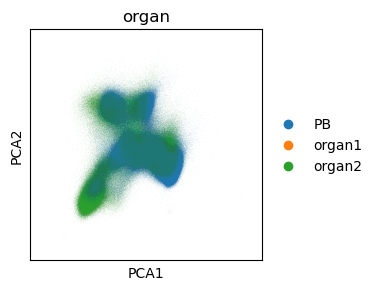

In [24]:
### similar to the mfi dataframe, we store the dimensionality reduction, the gate and the data layer within the slot entry name.
### that way, we can store dimensionality reductions, neighbors information etc. for multiple gates at the same time
### and easily access them

### the plotting utility will also use this information to access the correct slots

fp.pl.pca(dataset,
          layer = "transformed",
          gate = "CD45+",
          color = "organ")

In [25]:
### on a side note: missing coordinates (from cells of gates above in the hierarchy) are NaN
### the plotting functionality will internally subset the dataset for the corresponding gate and the NaNs will therefore automatically removed.
df = pd.DataFrame(data = dataset.obsm["X_pca_CD45+_transformed"],
                  columns = [f"PC{i}" for i in range(1, dataset.obsm["X_pca_CD45+_transformed"].shape[1] + 1)])
df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27
0,4.244428,-0.863238,2.040395,0.903165,-0.052635,0.917461,0.402200,-1.970635,0.063928,-0.258112,...,0.008404,0.242048,0.197927,0.311147,0.443438,-0.160421,-0.002733,-0.315380,0.280253,0.268692
1,-0.736669,-1.524519,-1.098698,-3.131466,2.484171,3.115051,-0.079241,0.804148,0.682266,0.888869,...,-0.482659,0.856920,-1.239273,-0.443394,0.384645,-0.750165,1.068304,-0.465006,0.402008,-0.445699
2,3.263546,0.695747,-4.066238,-0.605572,2.310344,0.741287,-0.396169,0.550276,1.935030,-0.269789,...,0.574619,0.646471,-2.001673,0.527332,0.040111,-0.574206,0.439761,-0.590389,0.420677,-0.424078
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.290764,0.394164,-3.439304,0.208660,0.913799,-1.809103,0.408101,1.676609,-1.180150,-1.800130,...,0.147976,0.144119,0.607445,0.643557,0.455702,-0.009944,1.217019,1.027428,0.424273,0.539168


In [26]:
### often times, we want to analyze one particular population extensively
### in order to not have to set the gate and layer for each function, we can apply these settings globally

fp.settings.default_layer = "transformed"
fp.settings.default_gate = "PBMC"

In [27]:
### that way, we can skip the layer argument for the functions
### here, an entry is created called X_pca_PBMC_transformed
fp.tl.pca(dataset)

dataset

AnnData object with n_obs × n_vars = 2367839 × 36
    obs: 'sample_ID', 'file_name', 'group_fd', 'internal_id', 'organ', 'staining', 'diag_main', 'diag_fine', 'donor_id', 'material', 'batch'
    var: 'pns', 'png', 'pne', 'type', 'pnn', 'cofactors'
    uns: 'metadata', 'panel', 'workspace', 'gating_cols', 'dataset_status_hash', 'cofactors', 'raw_cofactors', 'cofactor_table', 'mfi_sample_ID_compensated', 'settings', 'fop_sample_ID_compensated', 'pca_CD45+_transformed', 'organ_colors', 'pca_PBMC_transformed'
    obsm: 'gating', 'X_pca_CD45+_transformed', 'X_pca_PBMC_transformed'
    varm: 'pca_CD45+_transformed', 'pca_PBMC_transformed'
    layers: 'compensated', 'transformed'

C:\Users\tarik\anaconda3\envs\FACSPypeline\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1208: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
C:\Users\tarik\anaconda3\envs\FACSPypeline\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))


C:\Users\tarik\anaconda3\envs\FACSPypeline\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


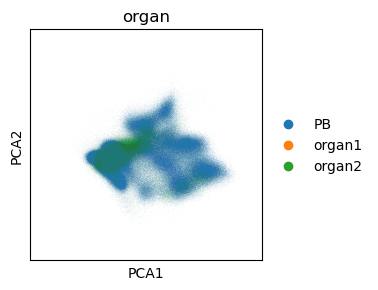

In [28]:
### also, the corresponding plot does not need gate and layer information
fp.pl.pca(dataset,
          color = "organ")